In [340]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from datetime import datetime

In [341]:
# list nonvalid pts
nonvalid = ['CF270AUD','CF285AUD','CF286AUD','CM229AUD','CM236AUD','CM237AUD','CM251AUD','CM256AUD','CM271AUD','CM287AUD','CM301AUD','MF246AUD','MF249AUD','MF272AUD','MM216AUD','MM250AUD','MM260AUD','MM282AUD','MM293AUD']

In [342]:
other = ['HRA001B','HRA002B','HRA002B','HRA001B','HRA002B','HRA002B','HRA002B','HRA004B','HRA005B','HRA006B','HRA004B','HRA005B','HRA008B','HRA006B','HRA008B','HRA009B','HRA009B','HRA009B','HRA012B','HRA012B','HRA013B','HRA015B','HRA013B','HRA016B','HRA015B','HRA016B','HRA016B']


In [343]:
# read, summarize data
df = pd.read_csv("measures_export.csv")  # dsmb_measures_2023 report in redcap
df = df.loc[df['record_id'] != 'test']
df = df.loc[df['record_id'] != 'TEST_001']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1204 entries, 0 to 1203
Data columns (total 61 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   record_id                                          1204 non-null   object 
 1   redcap_event_name                                  1204 non-null   object 
 2   redcap_survey_identifier                           0 non-null      float64
 3   partstatus                                         323 non-null    float64
 4   mini_timestamp                                     122 non-null    object 
 5   mini_suicide_sum                                   268 non-null    float64
 6   mini_suicide_dx                                    170 non-null    float64
 7   mini_suicide_dx_2                                  153 non-null    float64
 8   suicide_notes                                      58 non-null     object 
 9   suicide_

In [344]:
# total number of records
df['record_id'].nunique()

323

In [345]:
# counts for each participant status
df['partstatus'].value_counts()

99.0    190
2.0      95
90.0     28
1.0      10
Name: partstatus, dtype: int64

In [346]:
# unique events
df['redcap_event_name'].unique()

array(['participant_status_arm_3', 'baseline_arm_3', 'week_3_arm_3',
       'week_6_arm_3', 'week_10_arm_3', 'week_14_arm_3', 'week_12_arm_3',
       'week_4_arm_3', 'week_8_arm_3', 'week_2_arm_3'], dtype=object)

In [347]:
# Number of complete & active participants
df.loc[(df['partstatus'] == 1) | (df['partstatus'] == 2), 'record_id'].nunique()

105

In [348]:
# distribute partstatus to each row for each respective record id
for i, row in df.iterrows():
    df.loc[df.index==i,'partstatus'] = df.loc[(df['record_id']==row['record_id']) & (df['redcap_event_name']=='participant_status_arm_3'), 'partstatus'].reset_index().drop(columns=['index'])['partstatus'][0]
    df.loc[df.index==i,'new_current'] = df.loc[(df['record_id']==row['record_id']) & (df['redcap_event_name']=='participant_status_arm_3'), 'new_current'].reset_index().drop(columns=['index'])['new_current'][0]

# drop participant_status_arm_3 rows
index_status = df[df['redcap_event_name']=='participant_status_arm_3'].index
df.drop(index_status, inplace=True)
df

,record_id,redcap_event_name,redcap_survey_identifier,partstatus,mini_timestamp,mini_suicide_sum,mini_suicide_dx,mini_suicide_dx_2,suicide_notes,suicide_protective,...,phq8_1,phq8_2,phq8_3,phq8_4,phq8_5,phq8_6,phq8_7,phq8_8,phq8_total_score,patient_health_questionnaire_complete
1,CF017AUD,baseline_arm_3,NaN,2.0,2021-11-19 10:12:04,0.0,0.0,1.0,NaN,NaN,...,1.0,0.0,3.0,1.0,2.0,0.0,2.0,3.0,12.0,2.0
2,CF017AUD,week_3_arm_3,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CF017AUD,week_6_arm_3,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,CF017AUD,week_10_arm_3,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,CF017AUD,week_14_arm_3,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,PM299AUD,baseline_arm_3,NaN,99.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1197,PM300AUD,baseline_arm_3,NaN,99.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1199,PM305AUD,baseline_arm_3,NaN,90.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1201,PM307AUD,baseline_arm_3,NaN,99.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [349]:
# for i, row in df.iterrows():
#     df.iloc[i,2] = df.loc[(df['record_id']==row['record_id']) & (df['redcap_event_name']=='participant_status_arm_3'), 'partstatus']
#     df.iloc[i,39] = df.loc[(df['record_id']==row['record_id']) & (df['redcap_event_name']=='participant_status_arm_3'), 'new_current']

# index_status = df[df['redcap_event_name']=='participant_status_arm_3'].index
# df.drop(index_status, inplace=True)
# df

In [350]:
# read in log of survey invitations
df_invites = pd.read_csv('invitation_log.csv')  # survey invitation log in redcap
df_invites.drop_duplicates(subset=['Record','Survey'], inplace=True)
df_invites = df_invites.loc[~df_invites['Record'].isin(nonvalid)]
df_invites = df_invites.loc[~df_invites['Record'].isin(other)]
df_invites['Survey'].value_counts()

Begin Follow-Up Queue Week 3 (Arm 3: RCT)     121
Begin Follow-Up Queue Week 6 (Arm 3: RCT)     118
Begin Follow-Up Queue Week 10 (Arm 3: RCT)    110
Begin Follow-Up Queue Week 14 (Arm 3: RCT)     97
PHQ Week 4 (Arm 3: RCT)                        31
PHQ Week 8 (Arm 3: RCT)                        29
PHQ Week 12 (Arm 3: RCT)                       27
PHQ Week 2 (Arm 3: RCT)                        26
PHQ Week 6 (Arm 3: RCT)                         2
Phq9 Question 9 Only Week 6 (Arm 3: RCT)        2
ISI Week 14 (Arm 3: RCT)                        1
GAD-7 Week 6 (Arm 3: RCT)                       1
ISI Week 6 (Arm 3: RCT)                         1
System Usability Week 6 (Arm 3: RCT)            1
System Usability Week 3 (Arm 3: RCT)            1
GAD-7 Week 14 (Arm 3: RCT)                      1
System Usability Week 10 (Arm 3: RCT)           1
GAD-7 Week 3 (Arm 3: RCT)                       1
ISI Week 3 (Arm 3: RCT)                         1
GAD-7 Week 10 (Arm 3: RCT)                      1


In [351]:
df_invites

,Invitation send time,Reminder number,Participant Email,Record,Participant Identifier,Survey,Survey Link,Responded?,Errors<br>(if any)
27,2021-10-27 10:00:01,NaN,Vanessapjudd@hotmail.com,MF001AUD,NaN,Begin Follow-Up Queue Week 3 (Arm 3: RCT),NaN,Yes,NaN
28,2021-11-15 09:00:01,NaN,John.j.cady@gmail.com,MM015AUD,NaN,Begin Follow-Up Queue Week 3 (Arm 3: RCT),NaN,Yes,NaN
29,2021-11-17 09:00:01,NaN,Vanessapjudd@hotmail.com,MF001AUD,NaN,Begin Follow-Up Queue Week 6 (Arm 3: RCT),NaN,Yes,NaN
30,2021-11-18 09:00:01,NaN,Jessecnagle@gmail.com,CM016AUD,NaN,Begin Follow-Up Queue Week 3 (Arm 3: RCT),NaN,Yes,NaN
32,2021-12-02 10:00:01,NaN,keatonrobbins@gmail.com,CM023AUD,NaN,Begin Follow-Up Queue Week 3 (Arm 3: RCT),NaN,Yes,NaN
...,...,...,...,...,...,...,...,...,...
714,2023-07-26 10:00:02,NaN,Avalon7724@aol.com,CM319AUD,NaN,PHQ Week 12 (Arm 3: RCT),NaN,Yes,NaN
715,2023-07-29 10:00:01,NaN,Scl180004@gmail.com,MF316AUD,NaN,PHQ Week 12 (Arm 3: RCT),NaN,Yes,NaN
716,2023-07-30 10:00:01,NaN,Jskoczek@gmail.com,MM312AUD,NaN,Begin Follow-Up Queue Week 14 (Arm 3: RCT),NaN,Yes,NaN
717,2023-07-31 10:00:01,NaN,Kayclarsen@gmail.com,MF317AUD,NaN,PHQ Week 12 (Arm 3: RCT),NaN,Yes,NaN


In [352]:
# how many people started baseline visit (pulled from redcap - 'how many people started baseline')
completed_baseline_start = 122
baselines_after_feb6 = 14

In [353]:
# list of withdrawn participants
withdrawn_after_randomization = ['CF026AUD','CF231AUD','CF241AUD','CF270AUD','CF276AUD','CF285AUD',
                                 'CF286AUD','CF295AUD','CM229AUD','CM236AUD','CM237AUD','CM251AUD',
                                 'CM256AUD','CM263AUD','CM271AUD','CM287AUD','CM297AUD','CM301AUD',
                                 'MF246AUD','MF249AUD','MF258AUD','MF272AUD','MF281AUD','MM028AUD',
                                 'MM132AUD','MM133AUD','MM142AUD','MM145AUD','MM216AUD','MM232AUD',
                                 'MM250AUD','MM260AUD','MM268AUD','MM282AUD','MM290AUD','MM291AUD','MM293AUD']

In [354]:
# prep/export data for mini suicide risk
df_t = df.loc[(df['partstatus']==1) | (df['partstatus']==2) | ((df['partstatus']==99))]
#df_t['record_id'].nunique()
df_t.to_csv('for_mini_risk.csv', index=False)

In [355]:
# clean-up
#df_c = df.loc[df['partstatus'] != 90]
df_c = df.loc[(df['partstatus']==1) | (df['partstatus']==2) | ((df['partstatus']==99) & (df['record_id'].isin(withdrawn_after_randomization)))]
df_c = df_c.loc[~df_c['record_id'].isin(nonvalid)]
df_c['partstatus'] = df_c['partstatus'].replace({1:'active',2:'complete',99:'withdrawn/excluded'})
df_c['redcap_event_name'] = df_c['redcap_event_name'].apply(lambda x: re.split('_arm_3', x)[0])
df_c.insert(2, 'total_invites', np.nan)
df_c


,record_id,redcap_event_name,total_invites,redcap_survey_identifier,partstatus,mini_timestamp,mini_suicide_sum,mini_suicide_dx,mini_suicide_dx_2,suicide_notes,...,phq8_1,phq8_2,phq8_3,phq8_4,phq8_5,phq8_6,phq8_7,phq8_8,phq8_total_score,patient_health_questionnaire_complete
1,CF017AUD,baseline,NaN,NaN,complete,2021-11-19 10:12:04,0.0,0.0,1.0,NaN,...,1.0,0.0,3.0,1.0,2.0,0.0,2.0,3.0,12.0,2.0
2,CF017AUD,week_3,NaN,NaN,complete,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CF017AUD,week_6,NaN,NaN,complete,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,CF017AUD,week_10,NaN,NaN,complete,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,CF017AUD,week_14,NaN,NaN,complete,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,MM318AUD,week_10,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,7.0,2.0
888,MM318AUD,week_12,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,3.0,3.0,1.0,0.0,1.0,0.0,11.0,2.0
890,MM321AUD,baseline,NaN,NaN,active,NaN,2.0,1.0,1.0,5/17/23 Note-to-file Participa...,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,24.0,2.0
891,MM321AUD,week_3,NaN,NaN,active,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [356]:
df_c['record_id'].nunique()

122

In [357]:
# define conditions and values for total invites

conditions = [(df_c['redcap_event_name']=='baseline'),(df_c['redcap_event_name']=='week_2'),(df_c['redcap_event_name']=='week_3'),
              (df_c['redcap_event_name']=='week_4'),(df_c['redcap_event_name']=='week_6'),(df_c['redcap_event_name']=='week_8'),
              (df_c['redcap_event_name']=='week_10'),(df_c['redcap_event_name']=='week_12'),(df_c['redcap_event_name']=='week_14')]

values = [completed_baseline_start,df_invites['Survey'].value_counts()['PHQ Week 2 (Arm 3: RCT)'],
          df_invites['Survey'].value_counts()['Begin Follow-Up Queue Week 3 (Arm 3: RCT)'],
          df_invites['Survey'].value_counts()['PHQ Week 4 (Arm 3: RCT)'],
          df_invites['Survey'].value_counts()['Begin Follow-Up Queue Week 6 (Arm 3: RCT)'],
          df_invites['Survey'].value_counts()['PHQ Week 8 (Arm 3: RCT)'],
          df_invites['Survey'].value_counts()['Begin Follow-Up Queue Week 10 (Arm 3: RCT)'],
          df_invites['Survey'].value_counts()['PHQ Week 12 (Arm 3: RCT)'],
          df_invites['Survey'].value_counts()['Begin Follow-Up Queue Week 14 (Arm 3: RCT)']]

In [358]:
# insert total invites in long format
df_c['total_invites'] = np.select(conditions, values)
df_c

,record_id,redcap_event_name,total_invites,redcap_survey_identifier,partstatus,mini_timestamp,mini_suicide_sum,mini_suicide_dx,mini_suicide_dx_2,suicide_notes,...,phq8_1,phq8_2,phq8_3,phq8_4,phq8_5,phq8_6,phq8_7,phq8_8,phq8_total_score,patient_health_questionnaire_complete
1,CF017AUD,baseline,122,NaN,complete,2021-11-19 10:12:04,0.0,0.0,1.0,NaN,...,1.0,0.0,3.0,1.0,2.0,0.0,2.0,3.0,12.0,2.0
2,CF017AUD,week_3,121,NaN,complete,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CF017AUD,week_6,118,NaN,complete,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,CF017AUD,week_10,110,NaN,complete,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,CF017AUD,week_14,97,NaN,complete,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,MM318AUD,week_10,110,NaN,active,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,7.0,2.0
888,MM318AUD,week_12,27,NaN,active,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,3.0,3.0,1.0,0.0,1.0,0.0,11.0,2.0
890,MM321AUD,baseline,122,NaN,active,NaN,2.0,1.0,1.0,5/17/23 Note-to-file Participa...,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,24.0,2.0
891,MM321AUD,week_3,121,NaN,active,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [359]:
# export clean dataset
df_c.to_csv('measures_clean.csv', index=False)

In [360]:
# create phq9 dataset
phq9 = df_c.loc[(df_c['redcap_event_name']!='baseline') & (df_c['redcap_event_name']!='week_3') & (df_c['new_current']==1), ['record_id','new_current','total_invites','redcap_event_name','phq9_q9_only','phq9_question_9_only_complete']]
phq9

,record_id,new_current,total_invites,redcap_event_name,phq9_q9_only,phq9_question_9_only_complete
107,CF219AUD,1.0,118,week_6,NaN,0.0
108,CF219AUD,1.0,110,week_10,NaN,0.0
109,CF219AUD,1.0,27,week_12,0.0,2.0
110,CF219AUD,1.0,97,week_14,0.0,2.0
114,CF230AUD,1.0,31,week_4,0.0,2.0
...,...,...,...,...,...,...
885,MM318AUD,1.0,118,week_6,0.0,2.0
886,MM318AUD,1.0,29,week_8,1.0,2.0
887,MM318AUD,1.0,110,week_10,0.0,2.0
888,MM318AUD,1.0,27,week_12,0.0,2.0


In [361]:
# filter invitation log based on valid participants
df_invites_phq9 = pd.DataFrame({'Record':phq9['record_id'].unique()}).merge(df_invites,how='left',on='Record')
df_invites_phq9['Survey'].value_counts()

Begin Follow-Up Queue Week 3 (Arm 3: RCT)     36
Begin Follow-Up Queue Week 6 (Arm 3: RCT)     35
PHQ Week 4 (Arm 3: RCT)                       30
Begin Follow-Up Queue Week 10 (Arm 3: RCT)    29
PHQ Week 8 (Arm 3: RCT)                       28
PHQ Week 12 (Arm 3: RCT)                      26
PHQ Week 2 (Arm 3: RCT)                       26
Begin Follow-Up Queue Week 14 (Arm 3: RCT)    16
PHQ Week 6 (Arm 3: RCT)                        2
Phq9 Question 9 Only Week 6 (Arm 3: RCT)       2
Name: Survey, dtype: int64

In [362]:
df_c

,record_id,redcap_event_name,total_invites,redcap_survey_identifier,partstatus,mini_timestamp,mini_suicide_sum,mini_suicide_dx,mini_suicide_dx_2,suicide_notes,...,phq8_1,phq8_2,phq8_3,phq8_4,phq8_5,phq8_6,phq8_7,phq8_8,phq8_total_score,patient_health_questionnaire_complete
1,CF017AUD,baseline,122,NaN,complete,2021-11-19 10:12:04,0.0,0.0,1.0,NaN,...,1.0,0.0,3.0,1.0,2.0,0.0,2.0,3.0,12.0,2.0
2,CF017AUD,week_3,121,NaN,complete,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CF017AUD,week_6,118,NaN,complete,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,CF017AUD,week_10,110,NaN,complete,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,CF017AUD,week_14,97,NaN,complete,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,MM318AUD,week_10,110,NaN,active,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,7.0,2.0
888,MM318AUD,week_12,27,NaN,active,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,3.0,3.0,1.0,0.0,1.0,0.0,11.0,2.0
890,MM321AUD,baseline,122,NaN,active,NaN,2.0,1.0,1.0,5/17/23 Note-to-file Participa...,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,24.0,2.0
891,MM321AUD,week_3,121,NaN,active,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [363]:
# create phq8 dataset
phq8 = df_c.loc[(df_c['redcap_event_name']!='week_3'), ['record_id','partstatus','redcap_event_name','total_invites','phq8_total_score','patient_health_questionnaire_complete','patient_health_questionnaire_timestamp']]
phq8['patient_health_questionnaire_timestamp'] = pd.to_datetime(phq8['patient_health_questionnaire_timestamp'])
phq8 = phq8.loc[phq8['patient_health_questionnaire_timestamp']>datetime(2023, 2, 6)]
phq8['patient_health_questionnaire_complete'] = np.where(phq8['patient_health_questionnaire_complete']==2,1,0)
phq8

,record_id,partstatus,redcap_event_name,total_invites,phq8_total_score,patient_health_questionnaire_complete,patient_health_questionnaire_timestamp
109,CF219AUD,complete,week_12,27,8.0,1,2023-02-07 07:57:22
110,CF219AUD,complete,week_14,97,12.0,1,2023-02-19 14:19:49
114,CF230AUD,complete,week_4,31,6.0,1,2023-02-09 07:10:14
115,CF230AUD,complete,week_6,118,8.0,1,2023-02-25 20:01:10
116,CF230AUD,complete,week_8,29,7.0,1,2023-03-08 10:07:14
...,...,...,...,...,...,...,...
886,MM318AUD,active,week_8,29,8.0,1,2023-06-27 10:01:28
887,MM318AUD,active,week_10,110,7.0,1,2023-07-11 10:52:46
888,MM318AUD,active,week_12,27,11.0,1,2023-07-25 13:15:55
890,MM321AUD,active,baseline,122,24.0,1,2023-05-17 09:24:51


In [364]:
phq8.loc[(phq8['patient_health_questionnaire_complete']==1) & (phq8['redcap_event_name']=='baseline') & (phq8['phq8_total_score'] != np.nan)]

,record_id,partstatus,redcap_event_name,total_invites,phq8_total_score,patient_health_questionnaire_complete,patient_health_questionnaire_timestamp
162,CF311AUD,active,baseline,122,15.0,1,2023-04-25 16:19:40
172,CF313AUD,active,baseline,122,13.0,1,2023-04-30 11:41:16
181,CF322AUD,active,baseline,122,8.0,1,2023-05-03 12:10:43
411,CM294AUD,complete,baseline,122,3.0,1,2023-02-14 16:22:54
421,CM297AUD,withdrawn/excluded,baseline,122,11.0,1,2023-02-06 13:59:01
429,CM319AUD,active,baseline,122,18.0,1,2023-05-03 13:52:10
569,MF306AUD,complete,baseline,122,2.0,1,2023-03-20 13:39:52
579,MF309AUD,active,baseline,122,9.0,1,2023-04-30 09:50:21
588,MF316AUD,active,baseline,122,19.0,1,2023-05-06 10:15:29
597,MF317AUD,active,baseline,122,21.0,1,2023-05-08 16:56:08


In [365]:
# define phq8 counts

conditions_phq8 = [(phq8['redcap_event_name']=='baseline'),(phq8['redcap_event_name']=='week_2'),
              (phq8['redcap_event_name']=='week_4'),(phq8['redcap_event_name']=='week_6'),(phq8['redcap_event_name']=='week_8'),
              (phq8['redcap_event_name']=='week_10'),(phq8['redcap_event_name']=='week_12'),(phq8['redcap_event_name']=='week_14')]

values_phq8 = [baselines_after_feb6,df_invites['Survey'].value_counts()['PHQ Week 2 (Arm 3: RCT)'],
          df_invites['Survey'].value_counts()['PHQ Week 4 (Arm 3: RCT)'],
          df_invites_phq9['Survey'].value_counts()['Begin Follow-Up Queue Week 6 (Arm 3: RCT)'],
          df_invites['Survey'].value_counts()['PHQ Week 8 (Arm 3: RCT)'],
          df_invites_phq9['Survey'].value_counts()['Begin Follow-Up Queue Week 10 (Arm 3: RCT)'],
          df_invites['Survey'].value_counts()['PHQ Week 12 (Arm 3: RCT)'],
          df_invites_phq9['Survey'].value_counts()['Begin Follow-Up Queue Week 14 (Arm 3: RCT)']]

In [366]:
# define phq invite names
phq_invite_names = ['PHQ Week 2 (Arm 3: RCT)', 'PHQ Week 4 (Arm 3: RCT)', 'Begin Follow-Up Queue Week 6 (Arm 3: RCT)', 'PHQ Week 8 (Arm 3: RCT)',
'Begin Follow-Up Queue Week 10 (Arm 3: RCT)', 'PHQ Week 12 (Arm 3: RCT)', 'Begin Follow-Up Queue Week 14 (Arm 3: RCT)']
# phq8_total_invites = completed_baseline_start + sum(1 for i in df_invites['Survey'] if i in phq_invite_names)
# phq8_total_invites

In [367]:
# insert phq8 invite counts
phq8['total_invites'] = np.select(conditions_phq8, values_phq8)

In [368]:
phq8.loc[(phq8['record_id']=='MM321AUD') & (phq8['redcap_event_name']=='baseline')].index

Int64Index([890], dtype='int64')

In [369]:
phq8 = phq8.drop(phq8.loc[(phq8['record_id']=='MM321AUD') & (phq8['redcap_event_name']=='baseline')].index)

In [370]:
# get overall completion for phq8
#phq8_overall = sum(phq8['patient_health_questionnaire_complete']) / phq8_total_invites
phq8_overall = sum(phq8['patient_health_questionnaire_complete']) / sum(values_phq8)
phq8_overall

0.8840579710144928

In [400]:
sum(phq8['patient_health_questionnaire_complete'])

183

In [401]:
sum(values_phq8)

207

In [371]:
phq8

,record_id,partstatus,redcap_event_name,total_invites,phq8_total_score,patient_health_questionnaire_complete,patient_health_questionnaire_timestamp
109,CF219AUD,complete,week_12,27,8.0,1,2023-02-07 07:57:22
110,CF219AUD,complete,week_14,16,12.0,1,2023-02-19 14:19:49
114,CF230AUD,complete,week_4,31,6.0,1,2023-02-09 07:10:14
115,CF230AUD,complete,week_6,35,8.0,1,2023-02-25 20:01:10
116,CF230AUD,complete,week_8,29,7.0,1,2023-03-08 10:07:14
...,...,...,...,...,...,...,...
885,MM318AUD,active,week_6,35,9.0,1,2023-06-13 12:50:32
886,MM318AUD,active,week_8,29,8.0,1,2023-06-27 10:01:28
887,MM318AUD,active,week_10,29,7.0,1,2023-07-11 10:52:46
888,MM318AUD,active,week_12,27,11.0,1,2023-07-25 13:15:55


In [372]:
# calculate completion rates for each event
completion = phq8.groupby('redcap_event_name', sort=False).agg({'patient_health_questionnaire_complete':'sum','total_invites':'mean'})
completion['phq8_complete'] = completion['patient_health_questionnaire_complete'] / completion['total_invites']
# add text displaying N
completion['phq8_complete_text'] = completion['patient_health_questionnaire_complete'].map(str) + '/' + completion['total_invites'].map(str)
completion.drop(columns=['patient_health_questionnaire_complete','total_invites'], inplace=True)
completion

,phq8_complete,phq8_complete_text
redcap_event_name,,
week_12,0.888889,24/27.0
week_14,1.000000,16/16.0
week_4,0.903226,28/31.0
week_6,0.828571,29/35.0
week_8,0.862069,25/29.0
week_10,0.827586,24/29.0
week_2,0.884615,23/26.0
baseline,1.000000,14/14.0


In [373]:
# define phq9 invite counts
conditions_phq9 = [(phq9['redcap_event_name']=='week_2'),(phq9['redcap_event_name']=='week_3'),
              (phq9['redcap_event_name']=='week_4'),(phq9['redcap_event_name']=='week_6'),(phq9['redcap_event_name']=='week_8'),
              (phq9['redcap_event_name']=='week_10'),(phq9['redcap_event_name']=='week_12'),(phq9['redcap_event_name']=='week_14')]

values_phq9 = [df_invites_phq9['Survey'].value_counts()['PHQ Week 2 (Arm 3: RCT)'],
          df_invites_phq9['Survey'].value_counts()['Begin Follow-Up Queue Week 3 (Arm 3: RCT)'],
          df_invites_phq9['Survey'].value_counts()['PHQ Week 4 (Arm 3: RCT)'],
          df_invites_phq9['Survey'].value_counts()['Begin Follow-Up Queue Week 6 (Arm 3: RCT)'],
          df_invites_phq9['Survey'].value_counts()['PHQ Week 8 (Arm 3: RCT)'],
          df_invites_phq9['Survey'].value_counts()['Begin Follow-Up Queue Week 10 (Arm 3: RCT)'],
          df_invites_phq9['Survey'].value_counts()['PHQ Week 12 (Arm 3: RCT)'],
          df_invites_phq9['Survey'].value_counts()['Begin Follow-Up Queue Week 14 (Arm 3: RCT)']]

In [374]:
# insert phq9 invite counts
phq9['total_invites'] = np.select(conditions_phq9, values_phq9)
phq9

,record_id,new_current,total_invites,redcap_event_name,phq9_q9_only,phq9_question_9_only_complete
107,CF219AUD,1.0,35,week_6,NaN,0.0
108,CF219AUD,1.0,29,week_10,NaN,0.0
109,CF219AUD,1.0,26,week_12,0.0,2.0
110,CF219AUD,1.0,16,week_14,0.0,2.0
114,CF230AUD,1.0,30,week_4,0.0,2.0
...,...,...,...,...,...,...
885,MM318AUD,1.0,35,week_6,0.0,2.0
886,MM318AUD,1.0,28,week_8,1.0,2.0
887,MM318AUD,1.0,29,week_10,0.0,2.0
888,MM318AUD,1.0,26,week_12,0.0,2.0


In [375]:
# get total # of phq9 invites
phq9_total_invites = sum(1 for i in df_invites_phq9['Survey'] if i in phq_invite_names)
phq9_total_invites

190

In [376]:
# recode complete column
phq9['phq9_question_9_only_complete'] = np.where(phq9['phq9_question_9_only_complete']==2,1,0)
phq9

,record_id,new_current,total_invites,redcap_event_name,phq9_q9_only,phq9_question_9_only_complete
107,CF219AUD,1.0,35,week_6,NaN,0
108,CF219AUD,1.0,29,week_10,NaN,0
109,CF219AUD,1.0,26,week_12,0.0,1
110,CF219AUD,1.0,16,week_14,0.0,1
114,CF230AUD,1.0,30,week_4,0.0,1
...,...,...,...,...,...,...
885,MM318AUD,1.0,35,week_6,0.0,1
886,MM318AUD,1.0,28,week_8,1.0,1
887,MM318AUD,1.0,29,week_10,0.0,1
888,MM318AUD,1.0,26,week_12,0.0,1


In [377]:
# get overall completion for phq9
phq9_overall = sum(phq9['phq9_question_9_only_complete']) / phq9_total_invites
#phq9_overall = sum(phq9['phq9_question_9_only_complete']) / sum(values_phq9)
phq9_overall

0.8894736842105263

In [402]:
sum(phq9['phq9_question_9_only_complete'])

169

In [403]:
phq9_total_invites

190

In [378]:
# calculate phq9 completion by event
phq9_completion = phq9.groupby('redcap_event_name', sort=False).agg({'phq9_question_9_only_complete':'sum','total_invites':'mean'})
phq9_completion['phq9_complete'] = phq9_completion['phq9_question_9_only_complete'] / phq9_completion['total_invites']
phq9_completion['phq9_complete_text'] = phq9_completion['phq9_question_9_only_complete'].map(str) + '/' + phq9_completion['total_invites'].map(str)
phq9_completion.drop(columns=['phq9_question_9_only_complete','total_invites'], inplace=True)
phq9_completion

,phq9_complete,phq9_complete_text
redcap_event_name,,
week_6,0.828571,29/35.0
week_10,0.827586,24/29.0
week_12,0.923077,24/26.0
week_14,1.000000,16/16.0
week_4,0.933333,28/30.0
week_8,0.892857,25/28.0
week_2,0.884615,23/26.0


In [379]:
# get total number of isi/gad invites
isi_gad_invite_names = ['Begin Follow-Up Queue Week 3 (Arm 3: RCT)', 'Begin Follow-Up Queue Week 6 (Arm 3: RCT)', 'Begin Follow-Up Queue Week 10 (Arm 3: RCT)', 'Begin Follow-Up Queue Week 14 (Arm 3: RCT)']
isi_gad_total_invites = completed_baseline_start + sum(1 for i in df_invites['Survey'] if i in isi_gad_invite_names)
isi_gad_total_invites

568

In [380]:
# create isi/gad dataset
gad_isi = df_c.loc[(df_c['redcap_event_name']=='baseline')  | (df_c['redcap_event_name']=='week_3') | (df_c['redcap_event_name']=='week_6') | (df_c['redcap_event_name']=='week_10') | (df_c['redcap_event_name']=='week_14'), ['record_id','total_invites','redcap_event_name','gad_total_score','gad7_complete','isi_total_score','isi_complete']]
gad_isi

,record_id,total_invites,redcap_event_name,gad_total_score,gad7_complete,isi_total_score,isi_complete
1,CF017AUD,122,baseline,11.0,2.0,18.0,2.0
2,CF017AUD,121,week_3,11.0,2.0,18.0,2.0
3,CF017AUD,118,week_6,11.0,2.0,14.0,2.0
4,CF017AUD,110,week_10,12.0,2.0,16.0,2.0
5,CF017AUD,97,week_14,10.0,2.0,7.0,2.0
...,...,...,...,...,...,...,...
885,MM318AUD,118,week_6,7.0,2.0,17.0,2.0
887,MM318AUD,110,week_10,6.0,2.0,12.0,2.0
890,MM321AUD,122,baseline,21.0,2.0,26.0,2.0
891,MM321AUD,121,week_3,14.0,2.0,11.0,2.0


In [381]:
# recode complete columns
gad_isi['gad7_complete'] = np.where(gad_isi['gad7_complete']==2,1,0)
gad_isi['isi_complete'] = np.where(gad_isi['isi_complete']==2,1,0)
gad_isi

,record_id,total_invites,redcap_event_name,gad_total_score,gad7_complete,isi_total_score,isi_complete
1,CF017AUD,122,baseline,11.0,1,18.0,1
2,CF017AUD,121,week_3,11.0,1,18.0,1
3,CF017AUD,118,week_6,11.0,1,14.0,1
4,CF017AUD,110,week_10,12.0,1,16.0,1
5,CF017AUD,97,week_14,10.0,1,7.0,1
...,...,...,...,...,...,...,...
885,MM318AUD,118,week_6,7.0,1,17.0,1
887,MM318AUD,110,week_10,6.0,1,12.0,1
890,MM321AUD,122,baseline,21.0,1,26.0,1
891,MM321AUD,121,week_3,14.0,1,11.0,1


In [382]:
sum(gad_isi['gad7_complete'])

558

In [383]:
# get gad overall completion
gad_overall = sum(gad_isi['gad7_complete']) / isi_gad_total_invites
gad_overall

0.9823943661971831

In [384]:
sum(gad_isi['isi_complete'])

558

In [385]:
isi_gad_total_invites

568

In [386]:
# get isi overall completion
isi_overall = sum(gad_isi['isi_complete']) / isi_gad_total_invites
isi_overall

0.9823943661971831

In [387]:
gad_isi

,record_id,total_invites,redcap_event_name,gad_total_score,gad7_complete,isi_total_score,isi_complete
1,CF017AUD,122,baseline,11.0,1,18.0,1
2,CF017AUD,121,week_3,11.0,1,18.0,1
3,CF017AUD,118,week_6,11.0,1,14.0,1
4,CF017AUD,110,week_10,12.0,1,16.0,1
5,CF017AUD,97,week_14,10.0,1,7.0,1
...,...,...,...,...,...,...,...
885,MM318AUD,118,week_6,7.0,1,17.0,1
887,MM318AUD,110,week_10,6.0,1,12.0,1
890,MM321AUD,122,baseline,21.0,1,26.0,1
891,MM321AUD,121,week_3,14.0,1,11.0,1


In [388]:
# calculate gad completion by event
gad_completion = gad_isi.groupby('redcap_event_name', sort=False).agg({'gad7_complete':'sum','total_invites':'mean'})
gad_completion['gad_complete'] = gad_completion['gad7_complete'] / gad_completion['total_invites']
gad_completion['gad_complete_text'] = gad_completion['gad7_complete'].map(str) + '/' + gad_completion['total_invites'].map(str)
gad_completion.drop(columns=['gad7_complete','total_invites'], inplace=True)
gad_completion

,gad_complete,gad_complete_text
redcap_event_name,,
baseline,1.000000,122/122.0
week_3,0.975207,118/121.0
week_6,0.983051,116/118.0
week_10,0.972727,107/110.0
week_14,0.979381,95/97.0


In [389]:
# calculate isi completion by event
isi_completion = gad_isi.groupby('redcap_event_name', sort=False).agg({'isi_complete':'sum','total_invites':'mean'})
isi_completion['isi_completed'] = isi_completion['isi_complete'] / isi_completion['total_invites']
isi_completion['isi_completed_text'] = isi_completion['isi_complete'].map(str) + '/' + isi_completion['total_invites'].map(str)
isi_completion.drop(columns=['isi_complete','total_invites'], inplace=True)
isi_completion

,isi_completed,isi_completed_text
redcap_event_name,,
baseline,1.000000,122/122.0
week_3,0.975207,118/121.0
week_6,0.983051,116/118.0
week_10,0.972727,107/110.0
week_14,0.979381,95/97.0


In [390]:
# merge completion rates of all 4 measures
completion_rates = completion.merge(phq9_completion,how='outer',on='redcap_event_name')
completion_rates = completion_rates.merge(gad_completion,how='outer',on='redcap_event_name')
completion_rates = completion_rates.merge(isi_completion,how='outer',on='redcap_event_name')
completion_rates = completion_rates.reindex(['baseline','week_2','week_3','week_4','week_6','week_8','week_10','week_12','week_14'])
completion_rates

,phq8_complete,phq8_complete_text,phq9_complete,phq9_complete_text,gad_complete,gad_complete_text,isi_completed,isi_completed_text
redcap_event_name,,,,,,,,
baseline,1.000000,14/14.0,NaN,NaN,1.000000,122/122.0,1.000000,122/122.0
week_2,0.884615,23/26.0,0.884615,23/26.0,NaN,NaN,NaN,NaN
week_3,NaN,NaN,NaN,NaN,0.975207,118/121.0,0.975207,118/121.0
week_4,0.903226,28/31.0,0.933333,28/30.0,NaN,NaN,NaN,NaN
week_6,0.828571,29/35.0,0.828571,29/35.0,0.983051,116/118.0,0.983051,116/118.0
week_8,0.862069,25/29.0,0.892857,25/28.0,NaN,NaN,NaN,NaN
week_10,0.827586,24/29.0,0.827586,24/29.0,0.972727,107/110.0,0.972727,107/110.0
week_12,0.888889,24/27.0,0.923077,24/26.0,NaN,NaN,NaN,NaN
week_14,1.000000,16/16.0,1.000000,16/16.0,0.979381,95/97.0,0.979381,95/97.0


In [391]:
completion_rates.loc[:,['phq8_complete',]].dropna().index.values

array(['baseline', 'week_2', 'week_4', 'week_6', 'week_8', 'week_10',
       'week_12', 'week_14'], dtype=object)

In [392]:
completion_rates.loc[:,['phq8_complete',]].dropna().values

array([[1.        ],
       [0.88461538],
       [0.90322581],
       [0.82857143],
       [0.86206897],
       [0.82758621],
       [0.88888889],
       [1.        ]])

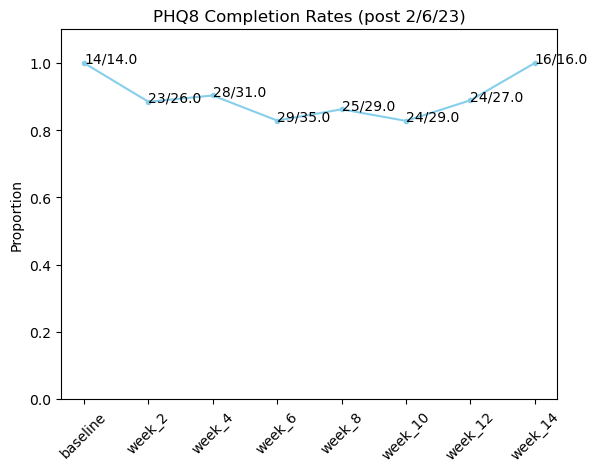

In [393]:
# plot phq8 completion rates
fig1, ax1 = plt.subplots()

ax1.plot(completion_rates.loc[:,['phq8_complete',]].dropna(), linestyle='-', color='skyblue', marker='.',)

for i, txt in enumerate(completion_rates['phq8_complete_text'].dropna()):
    ax1.annotate(txt, (completion_rates.loc[:,['phq8_complete',]].dropna().index.values[i], completion_rates.loc[:,['phq8_complete',]].dropna().values[i]))

plt.ylim([0,1.1])
#plt.legend(loc='lower left')
plt.xticks(rotation = 45)
plt.title('PHQ8 Completion Rates (post 2/6/23)')
plt.ylabel('Proportion')
plt.show()

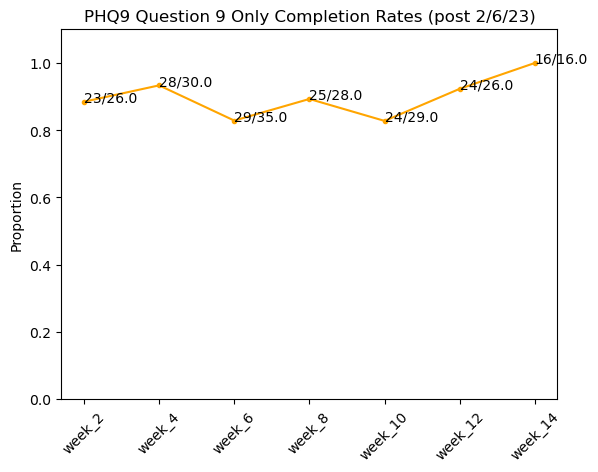

In [394]:
# plot phq9 completion rates
fig2, ax2 = plt.subplots()

ax2.plot(completion_rates.loc[:,['phq9_complete',]].dropna(), linestyle='-', color='orange' ,marker='.',)

for i, txt in enumerate(completion_rates['phq9_complete_text'].dropna()):
    ax2.annotate(txt, (completion_rates.loc[:,['phq9_complete',]].dropna().index.values[i], completion_rates.loc[:,['phq9_complete',]].dropna().values[i]))

plt.ylim([0,1.1])
#plt.legend(loc='lower left')
plt.xticks(rotation = 45)
plt.title('PHQ9 Question 9 Only Completion Rates (post 2/6/23)')
plt.ylabel('Proportion')
plt.show()

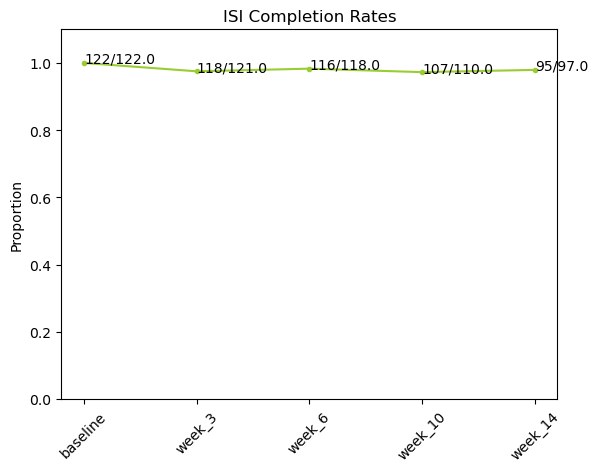

In [395]:
fig3, ax3 = plt.subplots()

ax3.plot(completion_rates.loc[:,['isi_completed']].dropna(), linestyle='-', color='yellowgreen' ,marker='.',)

for i, txt in enumerate(completion_rates['isi_completed_text'].dropna()):
    ax3.annotate(txt, (completion_rates.loc[:,['isi_completed',]].dropna().index.values[i], completion_rates.loc[:,['isi_completed',]].dropna().values[i]))

plt.ylim([0,1.1])
#plt.legend(loc='lower left')
plt.xticks(rotation = 45)
plt.title('ISI Completion Rates')
plt.ylabel('Proportion')
plt.show()

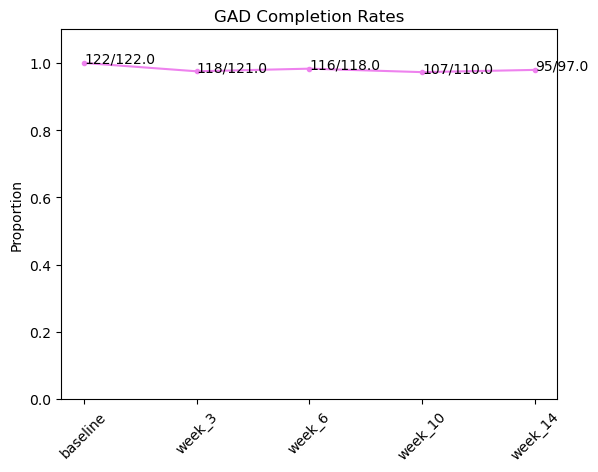

In [396]:
fig4, ax4 = plt.subplots()

ax4.plot(completion_rates.loc[:,['gad_complete']].dropna(), linestyle='-', color ='violet', marker='.',)

for i, txt in enumerate(completion_rates['gad_complete_text'].dropna()):
    ax4.annotate(txt, (completion_rates.loc[:,['gad_complete',]].dropna().index.values[i], completion_rates.loc[:,['gad_complete',]].dropna().values[i]))

plt.ylim([0,1.1])
#plt.legend(loc='lower left')
plt.xticks(rotation = 45)
plt.title('GAD Completion Rates')
plt.ylabel('Proportion')
plt.show()

[1.         0.88461538        nan 0.90322581 0.82857143 0.86206897
 0.82758621 0.88888889 1.        ]


/var/folders/71/p0nsprlx033b24hgn0jyt5n40000gp/T/ipykernel_69169/3160404138.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['test','baseline', 'week_2', 'week_3', 'week_4', 'week_6', 'week_8',


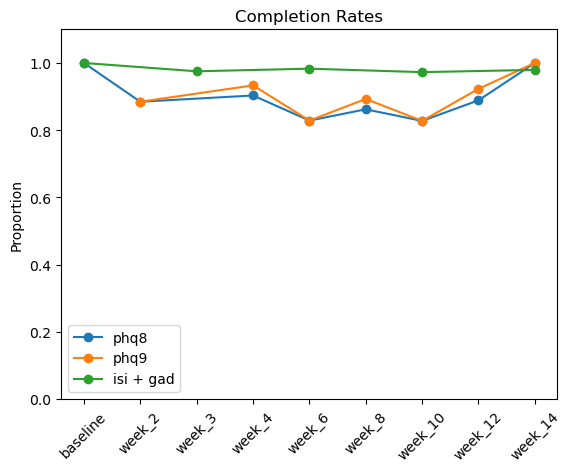

In [397]:
xs = np.arange(9)
seriesa = np.array(completion_rates['phq8_complete']).astype(np.double)
print(seriesa)
samask = np.isfinite(seriesa)
phq8_series = seriesa[samask]
series1 = np.array(completion_rates['phq9_complete']).astype(np.double)
s1mask = np.isfinite(series1)
phq9_series = series1[s1mask]
series2 = np.array(completion_rates['gad_complete']).astype(np.double)
s2mask = np.isfinite(series2)
gad_series = series2[s2mask]
series3 = np.array(completion_rates['isi_completed']).astype(np.double)
s3mask = np.isfinite(series2)
isi_series = series3[s3mask]

phq8_x = xs[samask]
phq9_x = xs[s1mask]
isi_gad_x = xs[s2mask]

fig, ax = plt.subplots()

ax.plot(xs[samask], seriesa[samask], linestyle='-', marker='o', label='phq8')
ax.plot(xs[s1mask], series1[s1mask], linestyle='-', marker='o', label='phq9')
#ax.plot(xs[s2mask], series2[s2mask], linestyle='-', marker='o', label='gad')
ax.plot(xs[s3mask], series3[s3mask], linestyle='-', marker='o', label='isi + gad')
ax.set_xticklabels(['test','baseline', 'week_2', 'week_3', 'week_4', 'week_6', 'week_8',
       'week_10', 'week_12', 'week_14'])
plt.ylim([0,1.1])
plt.legend(loc='lower left')
plt.xticks(rotation = 45)
plt.title('Completion Rates')
plt.ylabel('Proportion')
plt.show()

#TODO add legend

Of the participants who were randomized (n=142), I need to know how many weeks they were in the study. The number of participant-weeks will be the denominator for completion rates. The numerator will be how many of those weeks a survey was completed for each respective survey: PHQ, GAD, ISI.

Missing 36 people (141-105) in "withdrawn after randomization" excel

In [398]:
completion_overall = completion_rates.drop(columns=['phq8_complete_text','phq9_complete_text','gad_complete_text','isi_completed_text'])
completion_overall.loc['overall'] = {'phq8_complete':phq8_overall,'phq9_complete':phq9_overall,'gad_complete':gad_overall,'isi_completed':isi_overall}
completion_overall.round(decimals=2)

,phq8_complete,phq9_complete,gad_complete,isi_completed
redcap_event_name,,,,
baseline,1.00,NaN,1.00,1.00
week_2,0.88,0.88,NaN,NaN
week_3,NaN,NaN,0.98,0.98
week_4,0.90,0.93,NaN,NaN
week_6,0.83,0.83,0.98,0.98
week_8,0.86,0.89,NaN,NaN
week_10,0.83,0.83,0.97,0.97
week_12,0.89,0.92,NaN,NaN
week_14,1.00,1.00,0.98,0.98


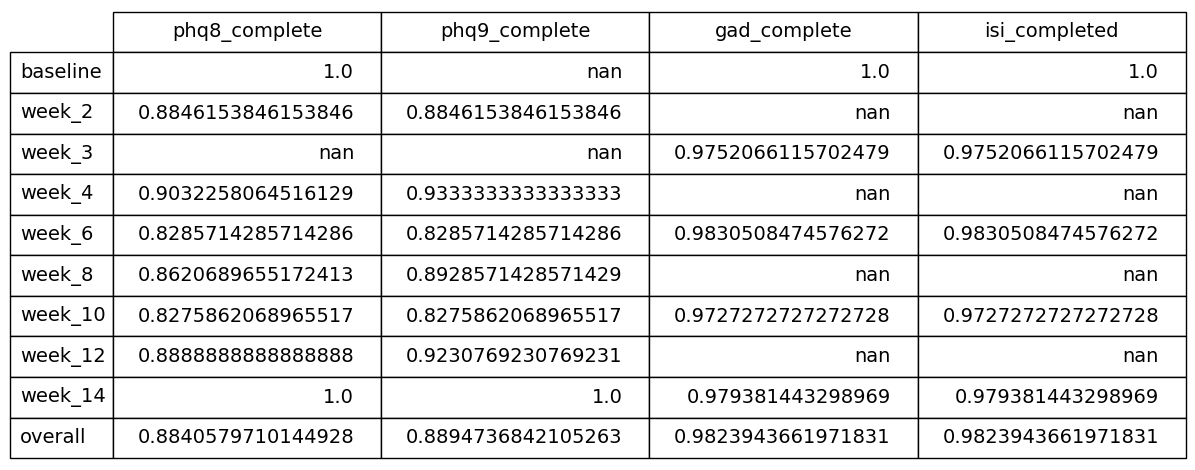

In [399]:
#define figure and axes
fig, ax = plt.subplots()

#hide the axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create table
table = ax.table(cellText=completion_overall.values, rowLabels=completion_overall.index, colLabels=completion_overall.columns, loc='center')

#display table
fig.tight_layout()
table.set_fontsize(14)
table.scale(2,2)
plt.show()